In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Ice_Cream_Selling.csv')

In [3]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.shape

(49, 2)

<font size="6" color='pink'>Visualization</font>

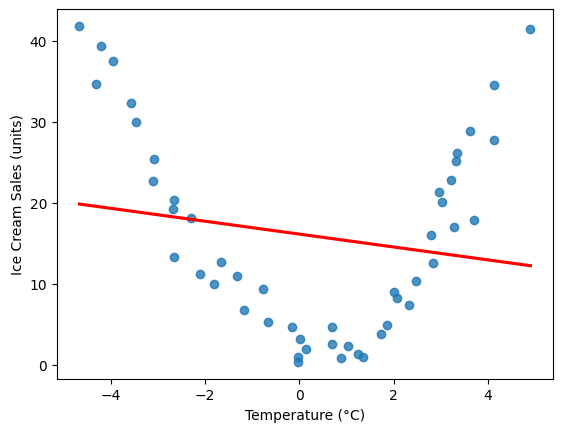

In [5]:
xpoints = df['Temperature (°C)']
ypoints = df['Ice Cream Sales (units)']
sns.regplot(x=xpoints, y=ypoints, line_kws={'color': 'red'}, ci=0)
plt.show()

<font size="6" color='pink'>Data Splitting</font>

In [6]:
X = df['Temperature (°C)'].values.reshape(-1,1)
y = df['Ice Cream Sales (units)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of y_test is {len(y_test)}')

Length of X_train is 39
Length of X_test is 10
Length of y_train is 39
Length of y_test is 10


<font size="6" color='pink'>Model Training</font>

In [9]:
model = DecisionTreeRegressor(random_state=42)

<font size="4" color='yellow'>Grid Search</font>

In [10]:
param_grid = {
    "max_depth": [2, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

In [11]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [12]:
best_dtr = grid_search.best_estimator_

In [13]:
cv_score = cross_val_score(best_dtr, X_train, y_train, cv=5, scoring="r2")

In [14]:
y_pred = best_dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Cross-Validation R² Scores: {cv_score}")
print(f"Mean CV R² Score: {cv_score.mean():.4f}")
print(f"Test Set MSE: {mse:.4f}")
print(f"Test Set R² Score: {r2:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Cross-Validation R² Scores: [0.81667493 0.90186336 0.86829945 0.94236711 0.93250565]
Mean CV R² Score: 0.8923
Test Set MSE: 21.8760
Test Set R² Score: 0.7692


In [16]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Error rate is {mape:.2f}%")

Error rate is 57.37%


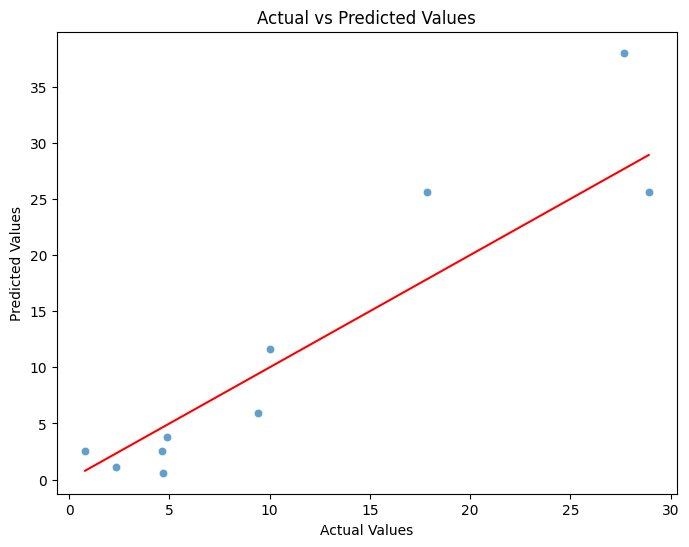

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()